<h1>Presentation, Interpolations.jl</h1>
By: Kasper Seglem

I explored the Julia library called Interpolations.jl. The repository can be found here: https://github.com/JuliaMath/Interpolations.jl.git

This package is used for a variety of interpolation schemes. In this notebook, I will be exploring and testing the CubicSplineInterpolations function from the package against varying polynomial functions.

<h2>About Polynomial Interpolation</h2>

Polynomial interpolation is used to estimate a fitting polynomial function for a set of data points. Polynomial functions can vary in the number of terms and in the exponent degree. Therefore, polynomial interpolation must consider many more answers than something like linear interpolation would need to. A common problem with polynomial interpolation is standout values, such as a sudden spike or drop. This can cause weird looking polynomial functions which may be accurate at the data points it was given, but not elsewhere.

<h2>About Runge's Phenomenon</h2>

Runge's Phenomenon is a problem that can occur for polynomial interpolation where the graph oscillates near the edges of an interval. This is more of a problem for polynomials of high degrees.

The following is an example of Runge's phenomenon

Found at: https://www.matecdev.com/posts/julia-interpolation.html

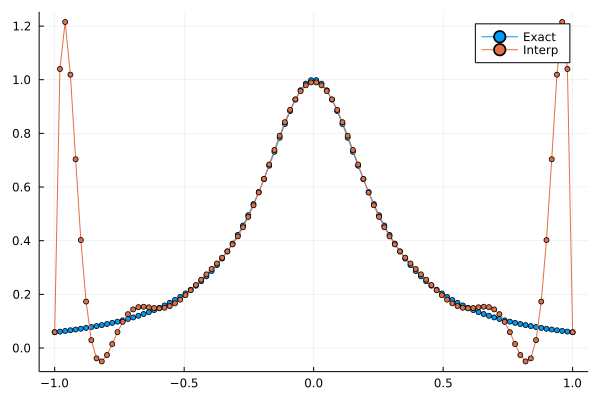

In [77]:
function LagrangeInterp1D( fvals, xnodes, barw, t )
    numt = 0
    denomt = 0

    for j = 1 : length( xnodes )
        tdiff = t - xnodes[j]
        numt = numt + barw[j] / tdiff * fvals[j]
        denomt = denomt + barw[j] / tdiff

        if ( abs(tdiff) < 1e-15 )
            numt = fvals[j]
            denomt = 1.0
            break
        end
    end
    return numt / denomt
end

#Equispaced points
EquispacedNodes(n) = [2*(j/n-0.5) for j=0:n]
EquispacedBarWeights(n) = [ (-1)^j * binomial(n,j) for j=0:n ]

# Chebyshev points of the second kind
ClosedChebNodes(n) = [cos(jπ/n) for j=0:n]
ClosedChebBarWeights(n) = [0.5; [(-1)^j for j=1:n-1]; 0.5*(-1)^n]

f(x) = 1/(1 + 16*x^2)

using Plots

# Sampling
n = 15;
xnodes = EquispacedNodes(n);
w = EquispacedBarWeights(n);
f_sample = f.(xnodes);

# Interpolation
t = LinRange(-1,1,100)
f_interp = [LagrangeInterp1D( f_sample, xnodes, w, t[j] ) for j=1:length(t)]
plot(t,f.(t), label="Exact", marker = 3)
plot!(t,f_interp, label="Interp", marker = 3)

Here, with a Legrange interpolation, we see the oscillating happening on both sides of the interval. 

If we, instead, try to use the CubicSplineInterpolation function we see that it does actually protect against Runge's phenomenon.

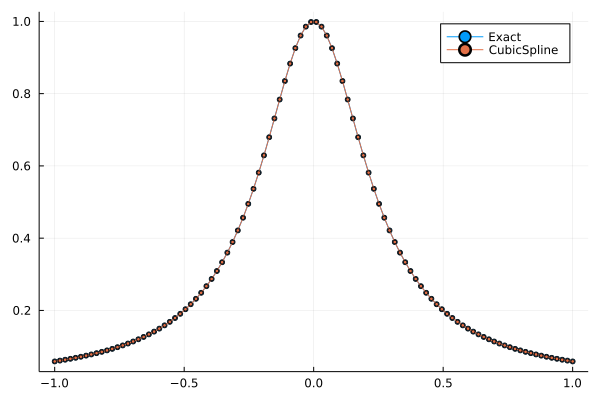

In [78]:
using Pkg
Pkg.add("Interpolations")
using Interpolations
using Plots

# Example data to interpolate
x = LinRange(-1,1,100)
f(x) = 1 / (1 + 16 * x ^ 2)
y = f.(x)

cubic_spline = CubicSplineInterpolation(t, f.(t), extrapolation_bc = Line())

x_ext = LinRange(-1,1,100)
plot(t,f.(t), label="Exact", marker = 3)
plot!(x,cubic_spline(x), label="CubicSpline", marker = 2)

In fact, the CubicSplineInterpolation perfectly covers the data and does not suffer from the oscillating problem.

<h2>Question</h2>
    
How does the CubicSplineFunction avoid Runge's phenomenon?
    
<h2>Experiment Proposal</h2>

I think it would be interesting to explore the CubicSplineInterpolation function from Interpolations.jl further and test whether it is actually protected from various instances of Runge's phenomenon. This could also include looking into cubic splines to find out how they prevent this issue.